## Load data

In [13]:
# Import the dataset loading function from sklearn
from sklearn.datasets import load_digits

# Load the hand-written digits dataset
digits = load_digits()

# Get the images and corresponding labels
images, labels = digits.images, digits.target
images.shape, labels.shape

((1797, 8, 8), (1797,))

## Exploratory data analysis & Data preprocessing &  feature engineering

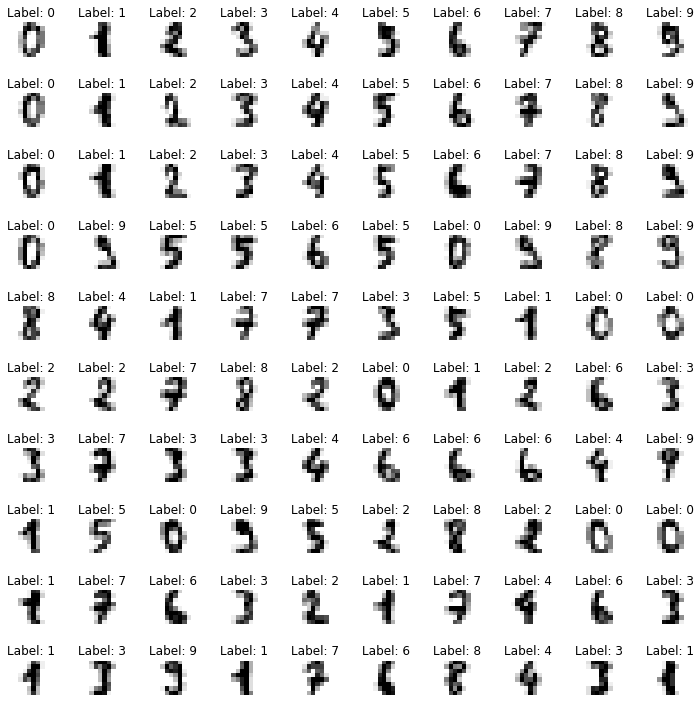

In [51]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# plot first 100 images
n = 100
_, axes = plt.subplots(10, 10, figsize=(10, 10))
plt.tight_layout()
for i in range(n):
    row, col = i // 10, i % 10
    axes[row, col].set_axis_off()
    axes[row, col].imshow(images[i,], cmap=plt.cm.gray_r, interpolation='nearest')
    axes[row, col].set_title('Label: %i' % labels[i])

In [52]:
# reshape images to vectors
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
X.shape

(1797, 64)

In [55]:
# Split data into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.2, shuffle=False)

print("--Shape of the training data--\n {}".format(X_train.shape))
print("\n--Shape of the testing data--\n {}".format(X_test.shape))

--Shape of the training data--
 (1437, 64)

--Shape of the testing data--
 (360, 64)


### PCA

In [208]:
from sklearn.decomposition import PCA
n_components = 10
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

(1437, 64)
(1437, 10)


0.7389054784358966

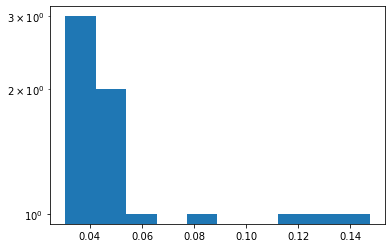

In [211]:
X_train_pca = pca.transform(X_train)

print(X_train.shape)
print(X_train_pca.shape)

plt.hist(pca.explained_variance_ratio_, bins=10, log=True)
pca.explained_variance_ratio_.sum()

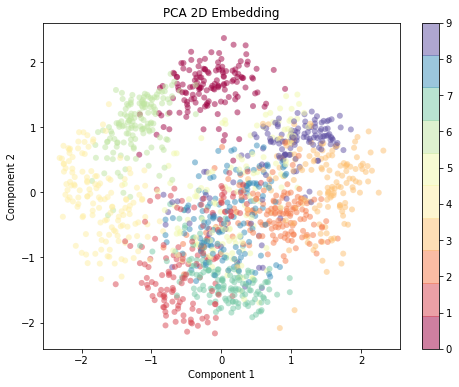

In [212]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA 2D Embedding')
plt.colorbar();

### TSNE

In [120]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)

X_train_tsne = tsne.fit_transform(X_train)

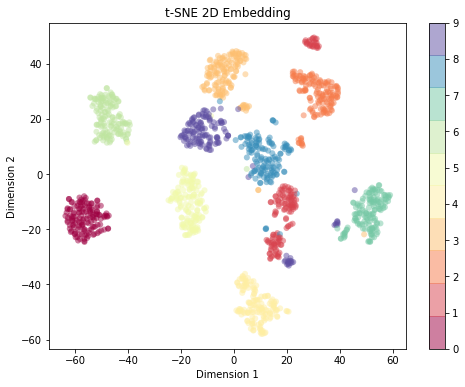

In [129]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE 2D Embedding')
plt.colorbar();

## Build up SVM classifier

### Training

In [193]:
# Import library for support vector machine classifier
from sklearn.svm import SVC

# Create a support vector classifier
clf = SVC(C=1, random_state=42)

# Train the model using the training sets
clf.fit(X_train, y_train)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

### Testing

The prediction accuracy: 94.17 %


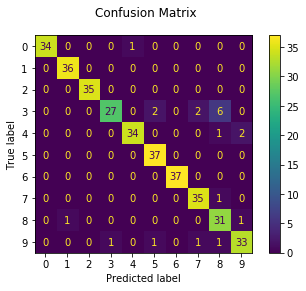

In [194]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

# Now predict the value of the digit on the test set:
y_pred_test = clf.predict(X_test)


# Display the testing results
acc = accuracy_score(y_test, y_pred_test)
print("The prediction accuracy: {:.2f} %".format(acc * 100))

disp = plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

### PCA (10 components) + SVC

The prediction accuracy: 93.89 %


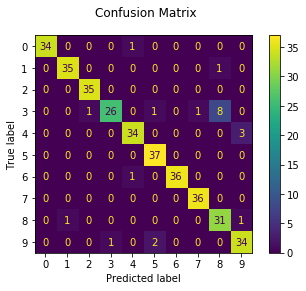

In [214]:
# Train the model using the training sets
clf.fit(X_train_pca, y_train)

# Now predict the value of the digit on the test set:
X_test_pca = pca.transform(X_test)
y_pred_test = clf.predict(X_test_pca)

# Display the testing results
acc = accuracy_score(y_test, y_pred_test)
print("The prediction accuracy: {:.2f} %".format(acc * 100))

disp = plot_confusion_matrix(clf, X_test_pca, y_test)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

## Fine-Tuning: tune the tree depth hyperparameter in the SVM classifier

In [205]:
# Hp tuning with Sklearn

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Build up the decision tree regressor
clf = SVC(random_state=42)

# Create a dictionary for the hyperparameter 'max_depth' with a range from 1 to 10
hps = {'C': [0.05, 0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15]}

# Transform 'performance_metric' into a scoring function using 'make_scorer'.
# The default scorer function is the greater the better, here MAE is the lower the better,
# so we set ``greater_is_better'' to be False.
scoring_fnc = make_scorer(accuracy_score)

# Create the grid search cv object (5-fold cross-validation)
grid_search = GridSearchCV(estimator=clf, 
                           param_grid=hps, 
                           scoring=scoring_fnc, 
                           cv=cv) 

# Fit the grid search object to the training data to search the optimal model
grid_search = grid_search.fit(X_train, y_train)

0.8997967479674797 {'C': 0.05}
0.9262509678668215 {'C': 0.1}
0.947822299651568 {'C': 0.2}
0.9603489159891598 {'C': 0.5}
0.9686943476577623 {'C': 1}
0.9756460511033682 {'C': 2}
0.9777342237708091 {'C': 3}
0.9777342237708091 {'C': 4}
0.9777318041037553 {'C': 5}
0.9784262485481998 {'C': 6}
0.9777318041037553 {'C': 7}
0.9770349399922571 {'C': 8}
0.9763380758807587 {'C': 9}
0.9763380758807587 {'C': 10}
0.9763380758807587 {'C': 15}


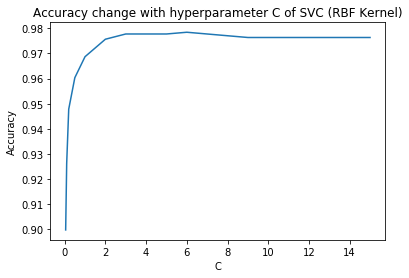

In [206]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

plt.plot(hps['C'], cvres["mean_test_score"])
plt.title('Accuracy change with hyperparameter C of SVC (RBF Kernel)')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

## Retrive the best model

Best hyperparameter is {'C': 6}.

The prediction accuracy on training set: 100.00 %
The prediction accuracy on test set: 95.83 %


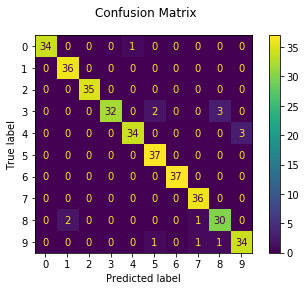

In [199]:
grid_search.best_params_
best_clf = grid_search.best_estimator_

# Produce the value for 'max_depth'
print("Best hyperparameter is {}.\n".format(grid_search.best_params_))

# Model prediction on training & test data
y_pred_train = best_clf.predict(X_train)
y_pred_test = best_clf.predict(X_test)

# Display the testing results
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)
print("The prediction accuracy on training set: {:.2f} %".format(train_acc * 100))
print("The prediction accuracy on test set: {:.2f} %".format(test_acc * 100))

disp = plot_confusion_matrix(best_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")

plt.show()